Uso este notebook para ir cambiando los tipos y cambiando C y Kernel.
Los tipos los cambio de modo que me quede para clasificar entre dos tipos.
Lo que me genera tres clasificadores, esto es la estratégia: uno versus todos.

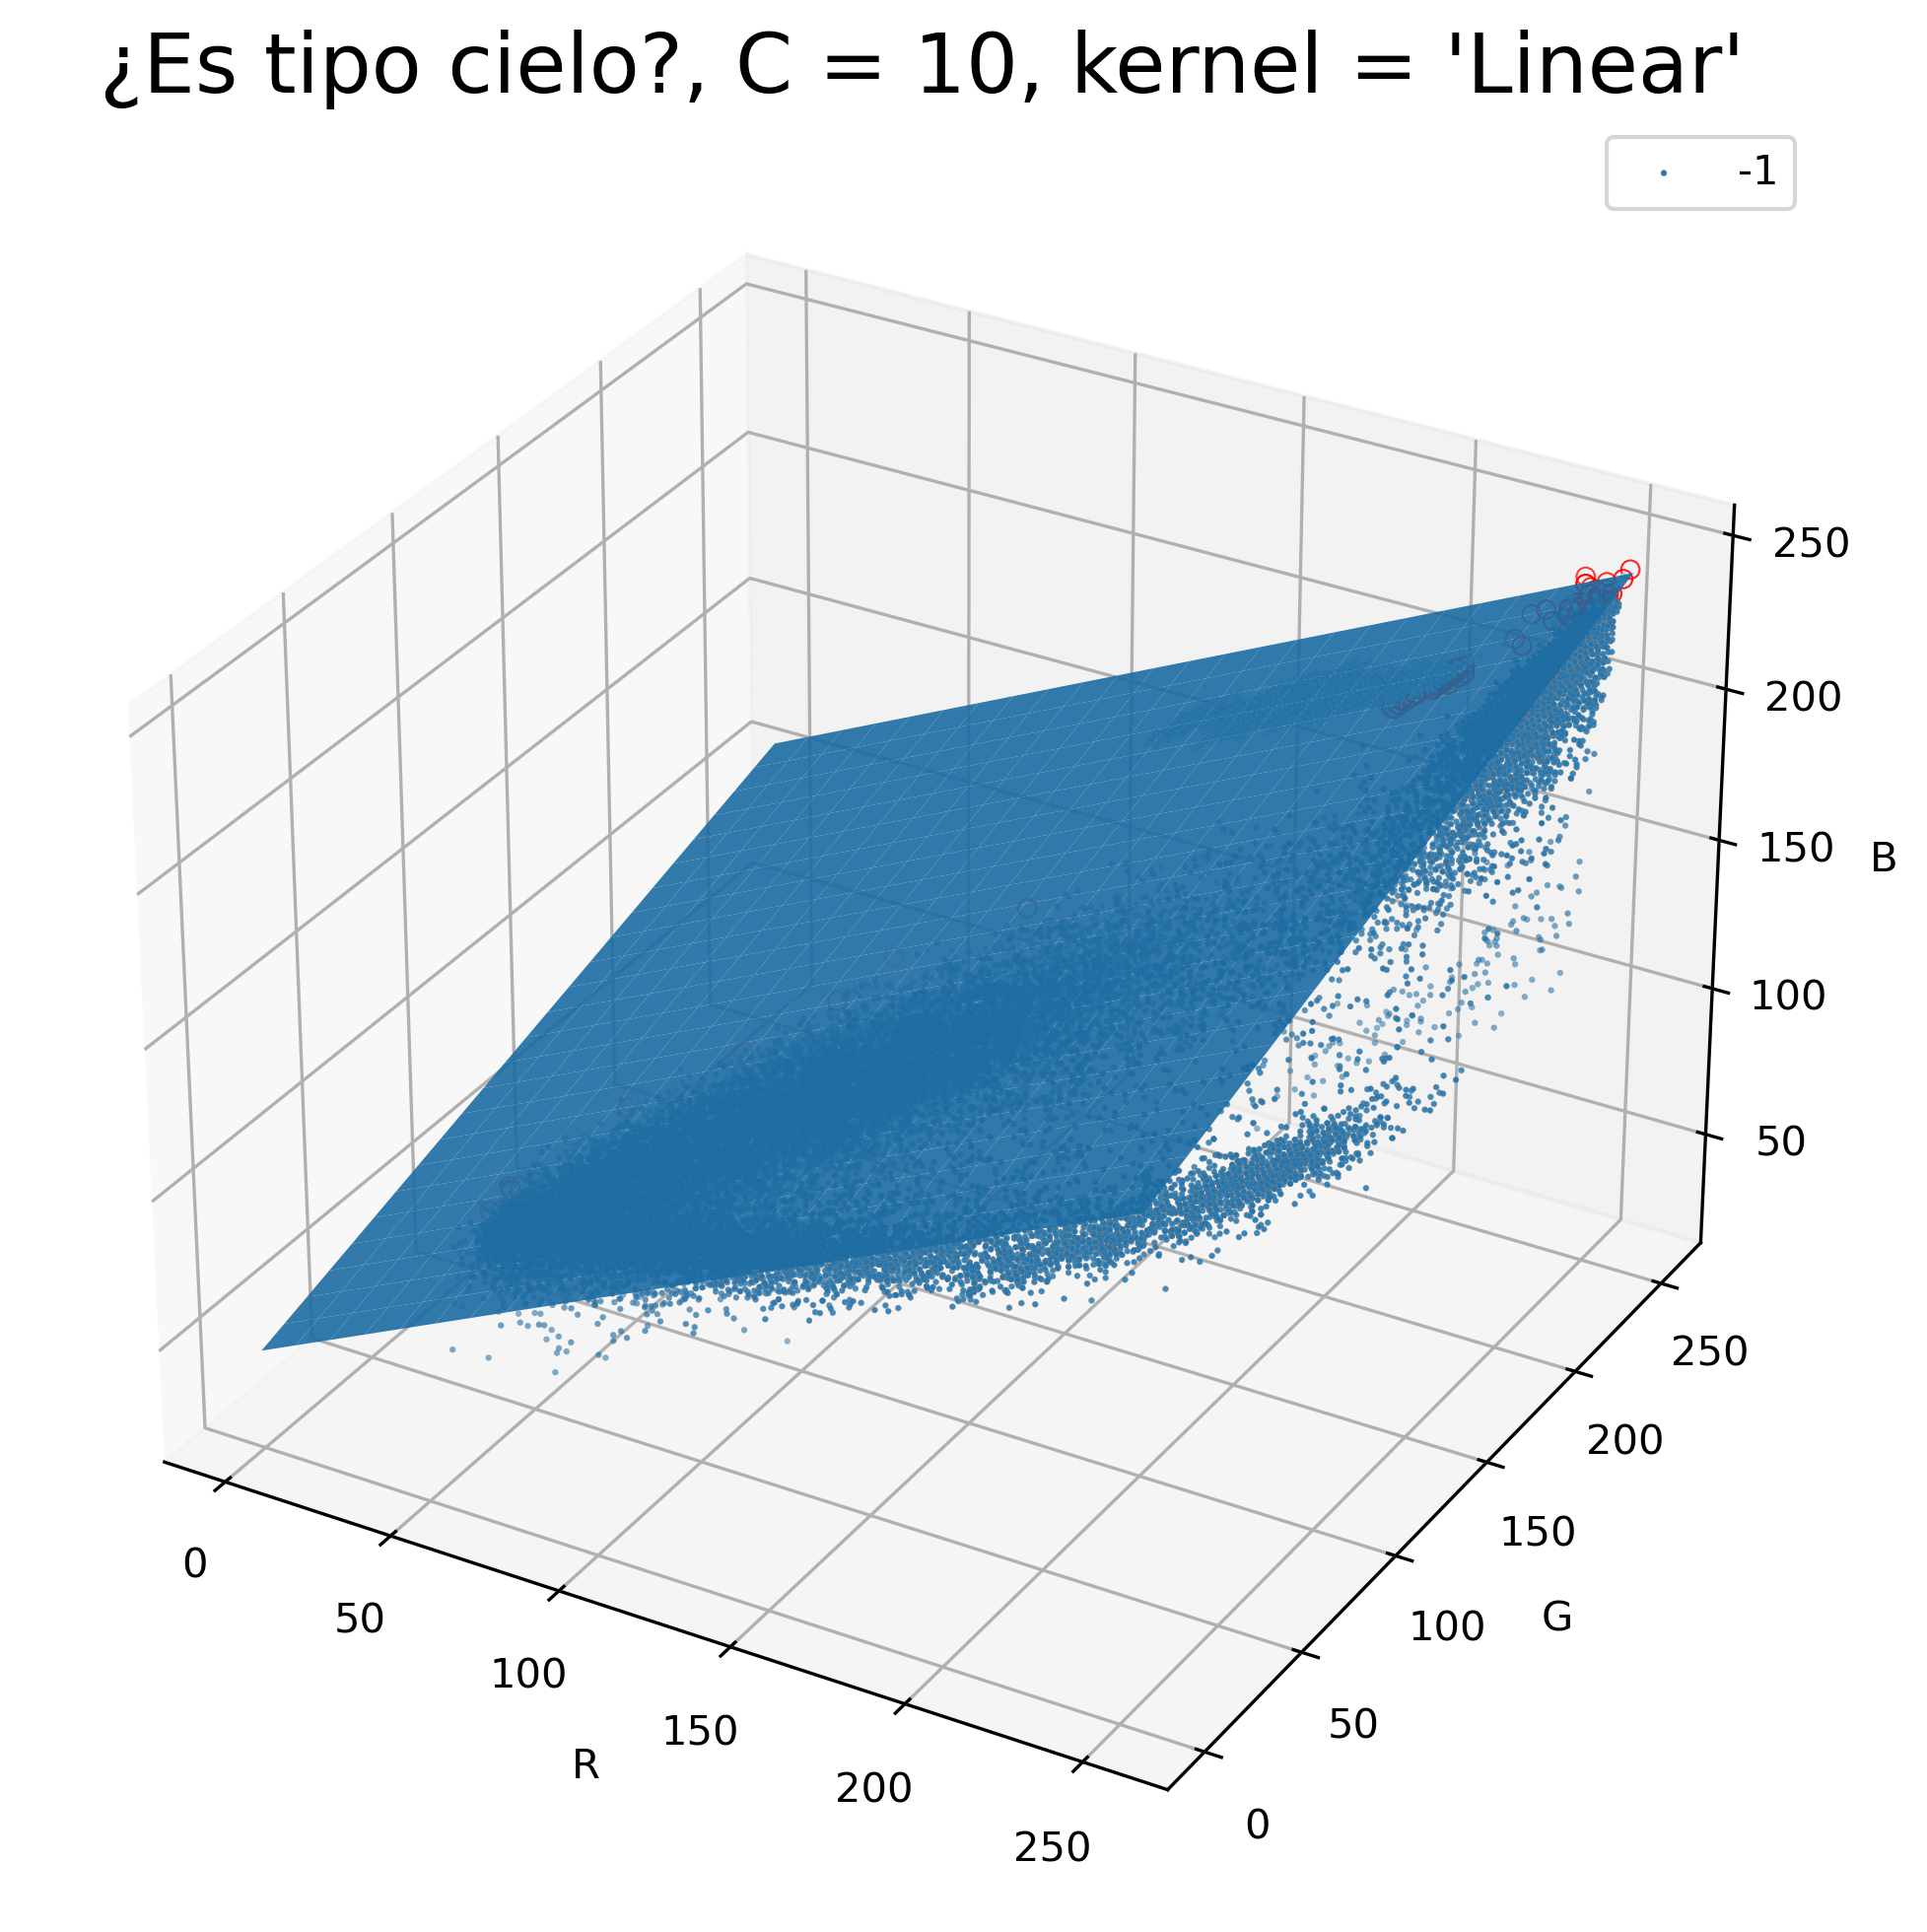


El accuracy de test es: 99.94485386273625 %


Predicción,-1,1
Real,,
-1,29232,20
1,2,10640


In [3]:
import matplotlib as plt
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

cielo = Image.open('cielo.jpg')
cieloA = np.array(cielo)
cieloM = np.reshape(cieloA,(-1,3))

pasto = Image.open('pasto.jpg')
pastoA = np.array(pasto)
pastoM = np.reshape(pastoA,(-1,3))

vaca = Image.open('vaca.jpg')
vacaA = np.array(vaca)
vacaM = np.reshape(vacaA,(-1,3))

cieloDF = pd.DataFrame(cieloM,columns=list('rgb'))
cieloDF = cieloDF.assign(Tipo=1)
pastoDF = pd.DataFrame(pastoM,columns=list('rgb'))
pastoDF = pastoDF.assign(Tipo=-1)
vacaDF = pd.DataFrame(vacaM,columns=list('rgb'))
vacaDF = vacaDF.assign(Tipo=-1)

dataset = cieloDF.append(pastoDF,ignore_index=True)
dataset = dataset.append(vacaDF,ignore_index=True)

# Preprocesado y modelado
# ==============================================================================
color = dataset.drop(columns = 'Tipo')
tipo = dataset['Tipo']

color_train, color_test, tipo_train, tipo_test = train_test_split(
                                        color,
                                        tipo,
                                        train_size   = 0.5,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo SVM lineal
# ==============================================================================
model = SVC(C = 10, kernel = 'linear' , random_state=123)
modelo = model.fit(color_train, tipo_train)

# Predicción valores grid
predicciones = modelo.predict(color_test)

# Creamos la figura
fig2 = plt.figure(figsize=(8,8),dpi=300)
ax2 = fig2.add_subplot( 111, projection='3d')

x = color_test.r
y = color_test.g
z = color_test.b
ax2.scatter3D(x, y, z,
              c=predicciones, marker='o',
              depthshade=True, s=2,
              cmap=plt.cm.tab20,
              edgecolors='gray',
              linewidth=0.1,)

ax2.set_title("¿Es tipo cielo?, C = 10, kernel = 'Linear'",fontsize=20)
ax2.set_xlabel('R')
ax2.set_ylabel('G')
ax2.set_zlabel('B')
ax2.legend(predicciones)

# Vectores soporte
ax2.scatter3D(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    modelo.support_vectors_[:, 2],
    s=20, linewidth=0.5,
    facecolors='none', edgecolors='red'
)

#Hiperplano
z = lambda x,y: (-modelo.intercept_[0]-modelo.coef_[0][0]*x -modelo.coef_[0][1]*y) / modelo.coef_[0][2]
tmp = np.linspace(0,255,25)
x,y = np.meshgrid(tmp,tmp)
ax2.plot_surface(x, y, z(x,y),alpha=0.9)

plt.show()

# Accuracy de test del modelo # ==============================================================================
accuracy = accuracy_score(
            y_true    = tipo_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy} %")

# Matriz de confusión de las predicciones de test# ==============================================================================
confusion_matrix = pd.crosstab(
    tipo_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix
